<a href="https://colab.research.google.com/github/Nurhanifah99/PCVK_GENAP_2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Gamma Correction pada citra 
-----------------------------
Masukan nilai Gamma: 3


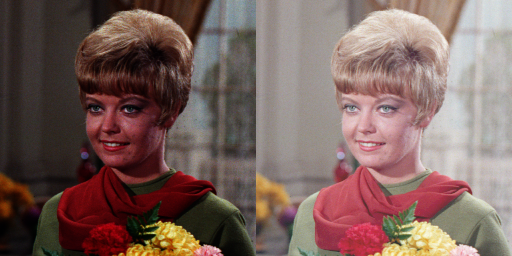

In [ ]:
import cv2 as cv
import numpy as np
import math
from google.colab.patches import cv2_imshow

img = cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff")

print(' Gamma Correction pada citra ')
print('-----------------------------')

try:
  gamma = int(input('Masukan nilai Gamma: '))
  gamma_fix = gamma / 10
  # print(gamma_fix)
  gamma_corrected = np.array(255*(img / 255) ** 0.3, dtype = 'uint8')
  fix = cv.hconcat((img, gamma_corrected))
  cv2_imshow(fix)
except ValueError:
  print('Error, not a number')